# HW4
* name: **Ali Safarpoor Dehkordi**
* sid: **99210301**


# imports:

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import numpy as np

In [ ]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-12 16:18:29--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-12 16:18:29--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdd1dff61f0dcae0d17791183b2.dl.dropboxusercontent.com/cd/0/inline/BnHRqDIZB9WSc96qy6ijBtIu04RvMg0yfV52F8O9bGYLS2X9_NJLEQZXQbk0CeSDx1n1QOIHzyY3KsPQgBrs9frXjfr_MrsMki2DvsXuS55ig2io5DZku7DlHuBKIzqOwjrYnqdUZpjW-HZ9CRlJ6vqNLcfgJeM-a9q-F3yfvDxl0Q/file# [following]
--2022-06-12 16:18:29--  https://ucdd1dff61f0dcae0d17791183b2.dl.dropboxusercontent.com/cd/0/inline/BnHRqDIZB9WSc96qy6ijBtIu04RvMg0yfV52F8O9bGYLS2X9_NJLEQZXQbk0CeSDx1n1QOIHzyY3KsPQgB

In [ ]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

# Q4

In [ ]:
%cd /content/
%cd /content/HW4-data/

!ls

/content
/content/HW4-data
 baby.mp4  'edge folder'   F22.mp4


In [ ]:
filename = 'baby.mp4'

In [ ]:
vidcap = cv2.VideoCapture(filename)
success,image = vidcap.read()
count = 0
originals = []
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    originals.append(gray)
    success,image = vidcap.read()

In [ ]:
imgs = np.copy(originals)

In [ ]:
a = imgs[0][:]

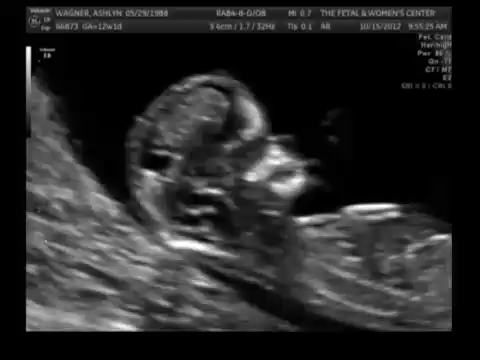

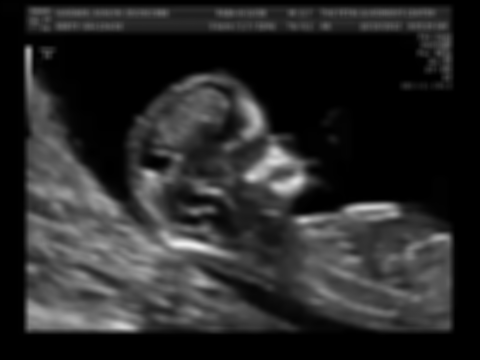

In [ ]:
b = sig.convolve2d(a, np.ones((7,7))/49, mode="same")
cv2_imshow(a)
b = np.uint8(b)

cv2_imshow(b)

In [ ]:
out = []
for image in tqdm(imgs):
    b = sig.convolve2d(image, np.ones((7,7))/49, mode="same")
    b = sig.convolve2d(b, np.ones((7,7))/49, mode="same")

    b = np.uint8(b)
    out.append(b)

imgs = out

 74%|███████▍  | 968/1300 [01:03<00:21, 15.78it/s]

In [ ]:
special_token = np.copy(imgs)

In [ ]:
imgs = np.copy(special_token)

In [ ]:
imgss = np.copy(imgs) 

In [ ]:
orgin = np.copy(originals)

In [ ]:
# init
img = np.copy(imgss[0])

x,y=73,124
(lx,ly) = (180,180)  

for i in range(x,x+lx+1):
    for j in [y,y+ly]:
        img[i][j] = 255      
for i in [x,x+lx]:
    for j in range(y,y+ly+1):
        img[i][j] = 255    
template = img[x:x+lx,y:y+ly]
out2 = [img]
# cv2_imshow(img)
# cv2_imshow(template)
count_=0
for img_ in tqdm(imgss):
    img = np.copy(img_)
    candidate_list = []
    best_score = 0
    besta , bestb = x,y
    bsample = []
    
    for i in range(max(40,x-10),x+10):
        for j in range(max(40,y-10),y+10):
            try:
                sample = img[i:i+lx,j:j+ly]
                score = 100*((sample*template).sum())/(sample.sum()**0.5)
                if score>=best_score:
                    besta = i
                    bestb = j
                    best_score = score
    
            except:
                pass
    
    x,y = besta,bestb
    org = orgin[count_]
    count_ += 1
    for i in range(besta,besta+lx+1):
        for j in [bestb,bestb+ly]:
            try: 
                org[i][j] = 255
            except:
                pass      
    for i in [besta,besta+lx]:
        for j in range(bestb,bestb+ly+1):
            try:
                org[i][j] = 255    
            except:
                pass

    template = img[besta:besta+lx,bestb:bestb+ly]
    
    out2.append(org)

100%|██████████| 1300/1300 [00:40<00:00, 32.44it/s]


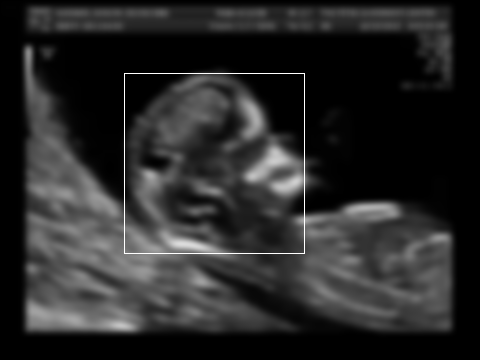

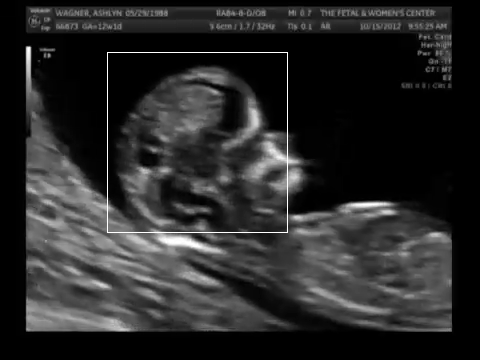

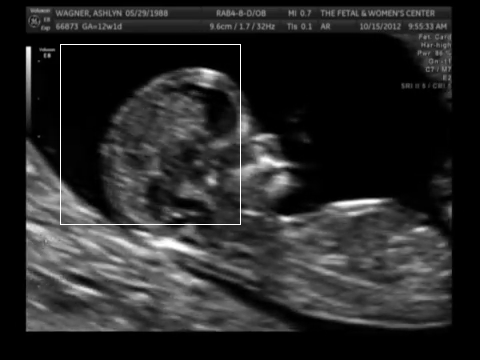

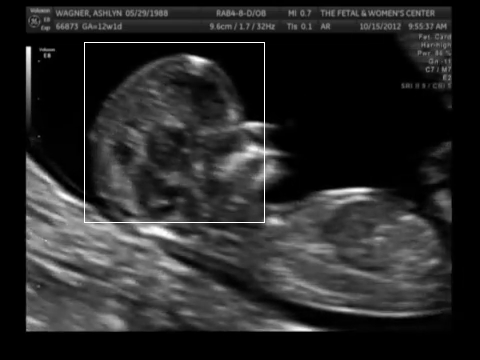

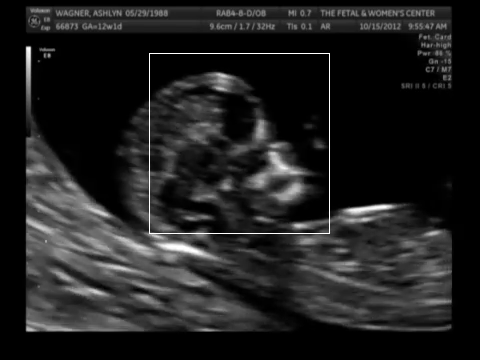

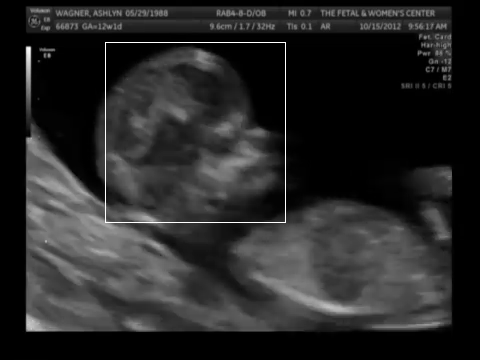

In [ ]:
cv2_imshow(out2[0])
cv2_imshow(out2[10])
cv2_imshow(out2[200])
cv2_imshow(out2[300])

cv2_imshow(out2[800])
cv2_imshow(out2[-1])

In [ ]:
import os
from moviepy.video.io import ImageSequenceClip

fps=25

out2 = np.array(out2)
out3 = [np.array([np.array(i).transpose(),np.array(i).transpose(),np.array(i).transpose()]).transpose() for i in out2]
print(len(out3))
clip = ImageSequenceClip.ImageSequenceClip(out3, fps=fps)
clip.write_videofile('baby2.mp4')

1301
[MoviePy] >>>> Building video baby2.mp4
[MoviePy] Writing video baby2.mp4


100%|██████████| 1301/1301 [00:16<00:00, 79.23it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: baby2.mp4 



In [19]:
from google.colab import files
files.download("baby2.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>